# 泰勒插值

一种**埃尔米特**插值

使用泰勒公式在$x_0$处展开得到多项式

$$
P_n(x)=\sum_{k=0}^{n} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^{k}
$$


In [3]:
import sympy as sp

def taylor(_f, df, x0, n):

    def p(x):
        res = _f(x0)
        dd = 1   #阶乘
        w = 1

        for i in range(1, n + 1):
            dd *= i
            w *= (x - x0)
            df_res = df(i, x0)

            res += (df_res * w / dd)
            
        return res
            
    return p


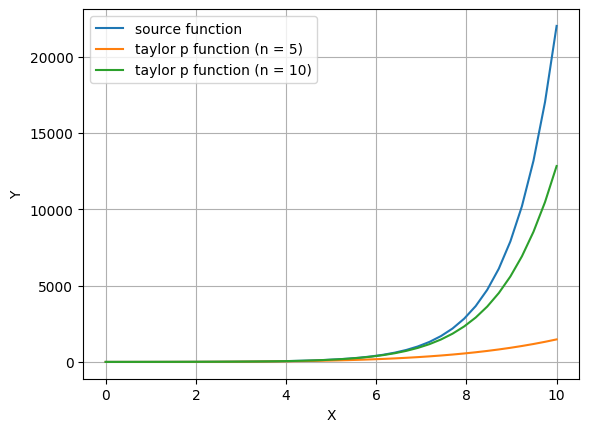

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 40)
y = np.exp(x)

plt.plot(x, y, '-', label='source function')

def df(n, x0):
    return math.exp(x0)

p = taylor(math.exp, df, 0, 5)
p_f = np.vectorize(p)
y_1 = p_f(x)
plt.plot(x, y_1, '-', label='taylor p function (n = 5)')

p2 = taylor(math.exp, df, 0, 10)
p_f2 = np.vectorize(p2)
y_2 = p_f2(x)
plt.plot(x, y_2, '-', label='taylor p function (n = 10)')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()